# Importing libraries and datasets

In [1]:
#basic libraries
import pandas as pd
import numpy as np
import math

#visualisation
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import missingno as msno
from plotly.figure_factory import create_scatterplotmatrix
from wordcloud import WordCloud
sns.set()

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

# import required libraries for ML
import sklearn

#feature eng
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

#Classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.svm import SVR

In [2]:
#datasets sales
sales = pd.read_csv("C:/Users/linco/Desktop/datastudy/DScourse/FinalProject/sales.csv")

In [3]:
#dataset customers
customers = pd.read_csv("C:/Users/linco/Desktop/datastudy/DScourse/FinalProject/customers.csv")

In [4]:
cust_scaled = pd.read_csv("C:/Users/linco/Desktop/datastudy/DScourse/FinalProject/customers_scaled.csv")

## Checking the datasets

In [5]:
sales.head()

,Unnamed: 0,OrderDate,StockDate,OrderNumber,ProductKey,ProductCategoryKey,CategoryName,ProductSubcategoryKey,SubcategoryName,ProductCost,...,Region,Country,Continent,OrderLineItem,OrderQuantity,OrderValue,OrderProfit,year,month,week
0,0,2015-01-01,9/21/2001,SO45080,332,1,Bikes,2,Road Bikes,413.1463,...,Northwest,United States,North America,1,1,699.0982,285.9519,2015,1,1
1,1,2015-01-01,12/5/2001,SO45079,312,1,Bikes,2,Road Bikes,2171.2942,...,Southwest,United States,North America,1,1,3578.2700,1406.9758,2015,1,1
2,2,2015-01-01,10/29/2001,SO45082,350,1,Bikes,1,Mountain Bikes,1898.0944,...,Australia,Australia,Pacific,1,1,3374.9900,1476.8956,2015,1,1
3,3,2015-01-01,11/16/2001,SO45081,338,1,Bikes,2,Road Bikes,413.1463,...,Canada,Canada,North America,1,1,699.0982,285.9519,2015,1,1
4,4,2015-01-02,12/15/2001,SO45083,312,1,Bikes,2,Road Bikes,2171.2942,...,United Kingdom,United Kingdom,Europe,1,1,3578.2700,1406.9758,2015,1,1


In [6]:
sales.columns

Index(['Unnamed: 0', 'OrderDate', 'StockDate', 'OrderNumber', 'ProductKey',
       'ProductCategoryKey', 'CategoryName', 'ProductSubcategoryKey',
       'SubcategoryName', 'ProductCost', 'ProductPrice', 'CustomerKey',
       'TerritoryKey', 'Region', 'Country', 'Continent', 'OrderLineItem',
       'OrderQuantity', 'OrderValue', 'OrderProfit', 'year', 'month', 'week'],
      dtype='object')

In [7]:
sales.drop(["Unnamed: 0"], axis=1, inplace=True)
sales.head()

,OrderDate,StockDate,OrderNumber,ProductKey,ProductCategoryKey,CategoryName,ProductSubcategoryKey,SubcategoryName,ProductCost,ProductPrice,...,Region,Country,Continent,OrderLineItem,OrderQuantity,OrderValue,OrderProfit,year,month,week
0,2015-01-01,9/21/2001,SO45080,332,1,Bikes,2,Road Bikes,413.1463,699.0982,...,Northwest,United States,North America,1,1,699.0982,285.9519,2015,1,1
1,2015-01-01,12/5/2001,SO45079,312,1,Bikes,2,Road Bikes,2171.2942,3578.2700,...,Southwest,United States,North America,1,1,3578.2700,1406.9758,2015,1,1
2,2015-01-01,10/29/2001,SO45082,350,1,Bikes,1,Mountain Bikes,1898.0944,3374.9900,...,Australia,Australia,Pacific,1,1,3374.9900,1476.8956,2015,1,1
3,2015-01-01,11/16/2001,SO45081,338,1,Bikes,2,Road Bikes,413.1463,699.0982,...,Canada,Canada,North America,1,1,699.0982,285.9519,2015,1,1
4,2015-01-02,12/15/2001,SO45083,312,1,Bikes,2,Road Bikes,2171.2942,3578.2700,...,United Kingdom,United Kingdom,Europe,1,1,3578.2700,1406.9758,2015,1,1


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56046 entries, 0 to 56045
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OrderDate              56046 non-null  object 
 1   StockDate              56046 non-null  object 
 2   OrderNumber            56046 non-null  object 
 3   ProductKey             56046 non-null  int64  
 4   ProductCategoryKey     56046 non-null  int64  
 5   CategoryName           56046 non-null  object 
 6   ProductSubcategoryKey  56046 non-null  int64  
 7   SubcategoryName        56046 non-null  object 
 8   ProductCost            56046 non-null  float64
 9   ProductPrice           56046 non-null  float64
 10  CustomerKey            56046 non-null  int64  
 11  TerritoryKey           56046 non-null  int64  
 12  Region                 56046 non-null  object 
 13  Country                56046 non-null  object 
 14  Continent              56046 non-null  object 
 15  Or

In [9]:
#checking null values
sales.isnull().sum()

OrderDate                0
StockDate                0
OrderNumber              0
ProductKey               0
ProductCategoryKey       0
CategoryName             0
ProductSubcategoryKey    0
SubcategoryName          0
ProductCost              0
ProductPrice             0
CustomerKey              0
TerritoryKey             0
Region                   0
Country                  0
Continent                0
OrderLineItem            0
OrderQuantity            0
OrderValue               0
OrderProfit              0
year                     0
month                    0
week                     0
dtype: int64

In [10]:
#check for duplicates
sales.duplicated().sum()

0

In [11]:
customers.head()

,Unnamed: 0,index,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,0,0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,...,Bachelors,Professional,M,M,1,0,0,2,137947,51.0
1,1,1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,...,Bachelors,Professional,M,S,0,1,3,3,101141,52.0
2,2,2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,...,Bachelors,Professional,M,M,1,1,3,3,91945,51.0
3,3,3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,...,Bachelors,Professional,F,S,0,1,0,0,86688,49.0
4,4,4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,...,Bachelors,Professional,F,S,1,4,5,5,92771,48.0


In [12]:
customers.columns

Index(['Unnamed: 0', 'index', 'CustomerID', 'FirstName', 'LastName',
       'AddressLine1', 'City', 'StateProvinceName', 'CountryRegionName',
       'PostalCode', 'PhoneNumber', 'BirthDate', 'Education', 'Occupation',
       'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'Age'],
      dtype='object')

In [13]:
customers.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)
customers.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,51.0
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,52.0
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,51.0
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,49.0
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,48.0


In [14]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            16921 non-null  int64  
 1   FirstName             16921 non-null  object 
 2   LastName              16921 non-null  object 
 3   AddressLine1          16921 non-null  object 
 4   City                  16921 non-null  object 
 5   StateProvinceName     16921 non-null  object 
 6   CountryRegionName     16921 non-null  object 
 7   PostalCode            16921 non-null  object 
 8   PhoneNumber           16921 non-null  object 
 9   BirthDate             16921 non-null  object 
 10  Education             16921 non-null  object 
 11  Occupation            16921 non-null  object 
 12  Gender                16921 non-null  object 
 13  MaritalStatus         16921 non-null  object 
 14  HomeOwnerFlag         16921 non-null  int64  
 15  NumberCarsOwned    

In [15]:
customers.isnull().sum()

CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
Age                     0
dtype: int64

In [16]:
customers.duplicated().sum()

0

In [17]:
cust_scaled.head()

,Unnamed: 0,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Age,YearlyIncome,CustomerID
0,0,4,4,0,0,1,0,0,2,1,0,0,0,0,0,0.306122,0.686872,11000
1,1,4,4,0,1,0,1,3,3,1,0,0,0,0,0,0.326531,0.490079,11001
2,2,4,4,0,0,1,1,3,3,1,0,0,0,0,0,0.306122,0.440910,11002
3,3,4,4,1,1,0,1,0,0,1,0,0,0,0,0,0.265306,0.412802,11003
4,4,4,4,1,1,1,4,5,5,1,0,0,0,0,0,0.244898,0.445327,11004


In [18]:
cust_scaled.columns

Index(['Unnamed: 0', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'Country_Australia', 'Country_Canada',
       'Country_France', 'Country_Germany', 'Country_United Kingdom',
       'Country_United States', 'Age', 'YearlyIncome', 'CustomerID'],
      dtype='object')

In [19]:
cust_scaled.drop(['Unnamed: 0'],axis=1,inplace=True)
cust_scaled.columns

Index(['Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'Country_Australia', 'Country_Canada', 'Country_France',
       'Country_Germany', 'Country_United Kingdom', 'Country_United States',
       'Age', 'YearlyIncome', 'CustomerID'],
      dtype='object')

In [20]:
cust_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16837 entries, 0 to 16836
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Education               16837 non-null  int64  
 1   Occupation              16837 non-null  int64  
 2   Gender                  16837 non-null  int64  
 3   MaritalStatus           16837 non-null  int64  
 4   HomeOwnerFlag           16837 non-null  int64  
 5   NumberCarsOwned         16837 non-null  int64  
 6   NumberChildrenAtHome    16837 non-null  int64  
 7   TotalChildren           16837 non-null  int64  
 8   Country_Australia       16837 non-null  int64  
 9   Country_Canada          16837 non-null  int64  
 10  Country_France          16837 non-null  int64  
 11  Country_Germany         16837 non-null  int64  
 12  Country_United Kingdom  16837 non-null  int64  
 13  Country_United States   16837 non-null  int64  
 14  Age                     16837 non-null

In [21]:
cust_scaled.isnull().sum()

Education                 0
Occupation                0
Gender                    0
MaritalStatus             0
HomeOwnerFlag             0
NumberCarsOwned           0
NumberChildrenAtHome      0
TotalChildren             0
Country_Australia         0
Country_Canada            0
Country_France            0
Country_Germany           0
Country_United Kingdom    0
Country_United States     0
Age                       0
YearlyIncome              0
CustomerID                0
dtype: int64

In [22]:
cust_scaled.duplicated().sum()

0

# Data Prep

## Target Columns

In [23]:
sales.columns

Index(['OrderDate', 'StockDate', 'OrderNumber', 'ProductKey',
       'ProductCategoryKey', 'CategoryName', 'ProductSubcategoryKey',
       'SubcategoryName', 'ProductCost', 'ProductPrice', 'CustomerKey',
       'TerritoryKey', 'Region', 'Country', 'Continent', 'OrderLineItem',
       'OrderQuantity', 'OrderValue', 'OrderProfit', 'year', 'month', 'week'],
      dtype='object')

In [24]:
#get customers total purchases

custspend = sales.groupby("CustomerKey")["OrderValue"].sum()
custspend

CustomerKey
11000    4656.3896
11001    2821.2122
11002    4466.8124
11003    4532.9866
11004    4568.0838
           ...    
29479    2049.0982
29480    2471.6068
29481    3374.9900
29482    2049.0982
29483    2049.0982
Name: OrderValue, Length: 17416, dtype: float64

In [25]:
custspend = pd.DataFrame(custspend)
custspend.reset_index(inplace=True)
custspend

,CustomerKey,OrderValue
0,11000,4656.3896
1,11001,2821.2122
2,11002,4466.8124
3,11003,4532.9866
4,11004,4568.0838
...,...,...
17411,29479,2049.0982
17412,29480,2471.6068
17413,29481,3374.9900
17414,29482,2049.0982


In [26]:
customers.shape

(16921, 20)

In [27]:
customers["CustomerID"].nunique()

16900

In [28]:
custspend["CustomerKey"].nunique()

17416

In [29]:
custspend.rename(columns={"CustomerKey":"CustomerID"}, inplace=True)

In [30]:
check = pd.merge(customers,custspend, on="CustomerID", how="left")

In [31]:
check

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,OrderValue
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,Professional,M,M,1,0,0,2,137947,51.0,4656.3896
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,Professional,M,S,0,1,3,3,101141,52.0,2821.2122
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,...,Professional,M,M,1,1,3,3,91945,51.0,4466.8124
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,...,Professional,F,S,0,1,0,0,86688,49.0,4532.9866
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,...,Professional,F,S,1,4,5,5,92771,48.0,4568.0838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,24211,Sharon,Shan,5850 Westwood Dr,Peterborough,England,United Kingdom,PB12,1 (11) 500 555-0145,1969-01-18,...,Skilled Manual,F,S,0,0,0,0,97084,48.0,1048.5048
16917,23627,Adrienne,Navarro,Buergermeister-ulrich-str 900,Erlangen,Bayern,Germany,91054,1 (11) 500 555-0123,1950-04-26,...,Management,F,S,0,4,4,4,110762,67.0,45.6142
16918,14500,Jasmine,Ward,1707 Willowwood Ct.,Torrance,California,United States,90505,202-555-0117,1937-11-18,...,Management,F,S,0,4,3,3,138097,79.0,NaN
16919,22223,Gabrielle,Parker,6857 Medina Drive,Mill Valley,California,United States,94941,213-555-0111,1957-04-11,...,Professional,F,M,1,1,0,2,101465,60.0,69.9600


In [32]:
check.isnull().sum()

CustomerID                0
FirstName                 0
LastName                  0
AddressLine1              0
City                      0
StateProvinceName         0
CountryRegionName         0
PostalCode                0
PhoneNumber               0
BirthDate                 0
Education                 0
Occupation                0
Gender                    0
MaritalStatus             0
HomeOwnerFlag             0
NumberCarsOwned           0
NumberChildrenAtHome      0
TotalChildren             0
YearlyIncome              0
Age                       0
OrderValue              984
dtype: int64

In [33]:
custspend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  17416 non-null  int64  
 1   OrderValue  17416 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 272.2 KB


In [34]:
cust_scaled_spend = pd.merge(cust_scaled,custspend, on="CustomerID", how="left")

In [35]:
cust_scaled_spend.head()

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Age,YearlyIncome,CustomerID,OrderValue
0,4,4,0,0,1,0,0,2,1,0,0,0,0,0,0.306122,0.686872,11000,4656.3896
1,4,4,0,1,0,1,3,3,1,0,0,0,0,0,0.326531,0.490079,11001,2821.2122
2,4,4,0,0,1,1,3,3,1,0,0,0,0,0,0.306122,0.440910,11002,4466.8124
3,4,4,1,1,0,1,0,0,1,0,0,0,0,0,0.265306,0.412802,11003,4532.9866
4,4,4,1,1,1,4,5,5,1,0,0,0,0,0,0.244898,0.445327,11004,4568.0838


In [36]:
#checking customers that didn't spend anything
cust_scaled_spend["OrderValue"].isnull().sum()

976

In [37]:
#replace them with zeros
cust_scaled_spend["OrderValue"].fillna(0, inplace=True)

In [38]:
cust_scaled_spend["OrderValue"].isnull().sum()

0

In [39]:
cust_scaled_spend["PurchasedFlag"] = np.where(cust_scaled_spend["OrderValue"]==0,0,1)
cust_scaled_spend.head()

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Age,YearlyIncome,CustomerID,OrderValue,PurchasedFlag
0,4,4,0,0,1,0,0,2,1,0,0,0,0,0,0.306122,0.686872,11000,4656.3896,1
1,4,4,0,1,0,1,3,3,1,0,0,0,0,0,0.326531,0.490079,11001,2821.2122,1
2,4,4,0,0,1,1,3,3,1,0,0,0,0,0,0.306122,0.440910,11002,4466.8124,1
3,4,4,1,1,0,1,0,0,1,0,0,0,0,0,0.265306,0.412802,11003,4532.9866,1
4,4,4,1,1,1,4,5,5,1,0,0,0,0,0,0.244898,0.445327,11004,4568.0838,1


In [40]:
cust_scaled_spend["PurchasedFlag"].value_counts()

1    15861
0      976
Name: PurchasedFlag, dtype: int64

In [41]:
976/(15861+976) # data is imbalanced but let's try a classifier without balancing first

0.05796757142008671

# Which customers will purchase from this brand? Purchase yes or no classification

## Logistic Regression - Imbalanced data

In [42]:
cust_scaled_spend.columns

Index(['Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'Country_Australia', 'Country_Canada', 'Country_France',
       'Country_Germany', 'Country_United Kingdom', 'Country_United States',
       'Age', 'YearlyIncome', 'CustomerID', 'OrderValue', 'PurchasedFlag'],
      dtype='object')

In [43]:
# first split target and features
X = cust_scaled_spend.drop(['CustomerID', 'OrderValue', 'PurchasedFlag'],axis=1)
y = cust_scaled_spend['PurchasedFlag']

In [44]:
X

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Age,YearlyIncome
0,4,4,0,0,1,0,0,2,1,0,0,0,0,0,0.306122,0.686872
1,4,4,0,1,0,1,3,3,1,0,0,0,0,0,0.326531,0.490079
2,4,4,0,0,1,1,3,3,1,0,0,0,0,0,0.306122,0.440910
3,4,4,1,1,0,1,0,0,1,0,0,0,0,0,0.265306,0.412802
4,4,4,1,1,1,4,5,5,1,0,0,0,0,0,0.244898,0.445327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16832,5,3,1,1,0,0,0,0,0,0,0,0,1,0,0.244898,0.468387
16833,3,5,1,1,0,4,4,4,0,0,0,1,0,0,0.632653,0.541520
16834,4,5,1,1,0,4,3,3,0,0,0,0,0,1,0.877551,0.687674
16835,3,4,1,0,1,1,0,2,0,0,0,0,0,1,0.489796,0.491811


In [45]:
y

0        1
1        1
2        1
3        1
4        1
        ..
16832    1
16833    1
16834    0
16835    1
16836    1
Name: PurchasedFlag, Length: 16837, dtype: int32

In [46]:
#split the data

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=66)

In [47]:
Xtrain

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Age,YearlyIncome
5324,4,3,1,1,1,1,5,5,0,0,0,0,0,1,0.346939,0.384759
3096,3,4,1,0,1,4,2,3,0,0,0,0,0,1,0.408163,0.560918
4021,4,3,1,1,1,3,4,4,0,0,0,0,0,1,0.346939,0.207893
7178,1,3,1,0,1,4,1,5,0,0,1,0,0,0,0.673469,0.424854
1906,4,4,0,1,1,1,0,1,1,0,0,0,0,0,0.448980,0.665538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5008,4,5,1,0,1,2,0,5,0,0,0,0,0,1,0.775510,0.573970
9165,5,5,1,1,1,2,0,3,0,0,0,0,0,1,0.795918,0.511798
5199,4,5,1,0,1,2,3,3,0,0,0,0,0,1,0.387755,0.661924
8243,5,5,1,1,1,1,0,2,1,0,0,0,0,0,0.775510,0.425410


In [48]:
Xtest

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Age,YearlyIncome
16044,3,3,0,0,1,1,0,1,0,0,0,0,0,1,0.367347,0.355576
9646,5,5,0,0,1,2,0,2,0,0,0,0,0,1,0.938776,0.414021
4931,2,1,0,0,1,1,1,1,0,0,1,0,0,0,0.224490,0.062782
550,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0.142857,0.044822
3643,5,3,1,1,1,0,0,0,0,0,0,0,1,0,0.244898,0.252100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,3,3,0,0,0,2,0,0,0,0,0,0,0,1,0.081633,0.261660
14214,4,3,1,0,1,0,1,1,0,0,0,0,0,1,0.204082,0.189832
6416,2,5,1,1,1,3,5,5,1,0,0,0,0,0,0.204082,0.509974
545,2,1,1,1,0,1,0,0,0,0,0,1,0,0,0.081633,0.037395


In [49]:
#start and fit the model

logreg = LogisticRegression(random_state=66)

logreg.fit(Xtrain, ytrain)

LogisticRegression(random_state=66)

In [50]:
#make purchase flag predictions
ypred = logreg.predict(Xtest)

In [51]:
ypred

array([1, 1, 1, ..., 1, 1, 1])

### Evaluate the model

In [52]:
# make fucntions for evaluation

def C_metrics_train(model, X_train, y_train):
    scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
    
    scores = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
    ypredTrain = model.predict(X_train)
    Acc_train = scores['test_acc'].mean()
    Precision_train = scores['test_prec_macro'].mean()
    Recall_train = scores['test_rec_macro'].mean()
    F1_train = scores['test_f1_macro'].mean()
    conf_matrix_train = confusion_matrix(y_train, ypredTrain)
    from sklearn.metrics import classification_report
    statist_train = []
   
    list_metrics = [Acc_train, Precision_train, Recall_train, F1_train]
    statist_train.append(list_metrics)
    statist_train = pd.DataFrame(statist_train,columns = ['Accuracy', 'Precision', 'Recall', 'f1'], index = ['Train'])
    
    print('-')
    print('TRAIN results')
    print('-')
    print('Confusion Matrix \n', conf_matrix_train)
    return statist_train

In [53]:
def C_metrics_test(model, X_test, y_test):
    
    scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
    
    scores = cross_validate(model, X_test, y_test, cv=10, scoring=scoring)
    ypredtest = model.predict(X_test)
    report = classification_report(y_test, ypredtest,zero_division=0, output_dict=True)
    report = pd.DataFrame(report).T
    
    Acc_test = report.loc['accuracy', :].mean()  
    Rest_metrics = report.iloc[:-3,:]
    
    Precision_test = Rest_metrics.loc[:,'precision'].mean()
    Recall_test = Rest_metrics.loc[:,'recall'].mean()
    F1_test = Rest_metrics.loc[:,'f1-score'].mean()
    conf_matrix_test = confusion_matrix(y_test, ypredtest)
    
    statist_test = []
   
    list_metrics = [Acc_test, Precision_test, Recall_test, F1_test]
    statist_test.append(list_metrics)
    statist_test = pd.DataFrame(statist_test,columns = ['Accuracy', 'Precision', 'Recall', 'f1'], index = ['test'])
     
    print('-')
    print('TEST results')
    print('-')
    print('Confusion Matrix \n', conf_matrix_test)
    print(' Classification report \n', Rest_metrics)
    return statist_test

In [54]:
def C_Allmetrics(model,X_train,y_train,X_test,y_test):
    
    stats_train = C_metrics_train(model, X_train,y_train)
    stats_test = C_metrics_test(model, X_test,y_test)
    final_metrics = pd.concat([stats_train,stats_test])
    print()
    print('Summary of the Metrics')
    print(final_metrics)
    return final_metrics

In [55]:
#evaluate the model

C_Allmetrics(logreg,Xtrain,ytrain,Xtest,ytest)

-
TRAIN results
-
Confusion Matrix 
 [[    0   668]
 [    0 11117]]
-
TEST results
-
Confusion Matrix 
 [[   0  308]
 [   0 4744]]
 Classification report 
    precision  recall  f1-score  support
0   0.000000     0.0  0.000000    308.0
1   0.939034     1.0  0.968559   4744.0

Summary of the Metrics
       Accuracy  Precision  Recall        f1
Train  0.943318   0.471659     0.5  0.485416
test   0.939034   0.469517     0.5  0.484279


,Accuracy,Precision,Recall,f1
Train,0.943318,0.471659,0.5,0.485416
test,0.939034,0.469517,0.5,0.484279


## Log Reg - balanced data

### SMOTE

In [56]:
#balance the data using SMOTE
smote = SMOTE(random_state=66)

Xsm, ysm = smote.fit_resample(X, y)

In [57]:
print('\nBefore OVER-sampling\n', y.value_counts())
print('\nAfter OVER-sampling\n', ysm.value_counts())


Before OVER-sampling
 1    15861
0      976
Name: PurchasedFlag, dtype: int64

After OVER-sampling
 1    15861
0    15861
Name: PurchasedFlag, dtype: int64


### Re build the model

In [58]:
#split the data

X_train, X_test, y_train, y_test = train_test_split(Xsm, ysm, test_size=0.3, random_state=66)

In [59]:
#instantiate and fit the model

logreg2 = LogisticRegression(random_state=66)

logreg2.fit(X_train, y_train)


LogisticRegression(random_state=66)

In [60]:
#make purchase flag predictions
ypred2 = logreg2.predict(X_test)

In [61]:
ypred2

array([0, 1, 1, ..., 1, 0, 1])

In [62]:
C_Allmetrics(logreg2, X_train, y_train, X_test, y_test)

-
TRAIN results
-
Confusion Matrix 
 [[7144 3973]
 [3616 7472]]
-
TEST results
-
Confusion Matrix 
 [[3008 1736]
 [1538 3235]]
 Classification report 
    precision    recall  f1-score  support
0   0.661681  0.634064  0.647578   4744.0
1   0.650774  0.677771  0.663998   4773.0

Summary of the Metrics
       Accuracy  Precision    Recall        f1
Train  0.657014   0.657227  0.657035  0.656915
test   0.655984   0.656228  0.655917  0.655788


,Accuracy,Precision,Recall,f1
Train,0.657014,0.657227,0.657035,0.656915
test,0.655984,0.656228,0.655917,0.655788


## Random Forest - imbalanced

In [63]:
# variables and split: using the same

In [64]:
#instantiate and fit

rand_forest = RandomForestClassifier(n_estimators=100, random_state=66)

rand_forest.fit(Xtrain, ytrain)

RandomForestClassifier(random_state=66)

In [65]:
#predictions
ypred_rf = rand_forest.predict(Xtest)
ypred_rf

array([1, 1, 1, ..., 1, 1, 1])

In [66]:
#evaluate

C_Allmetrics(rand_forest, Xtrain, ytrain, Xtest, ytest)

-
TRAIN results
-
Confusion Matrix 
 [[  667     1]
 [    0 11117]]
-
TEST results
-
Confusion Matrix 
 [[   8  300]
 [  52 4692]]
 Classification report 
    precision    recall  f1-score  support
0   0.133333  0.025974  0.043478    308.0
1   0.939904  0.989039  0.963846   4744.0

Summary of the Metrics
       Accuracy  Precision    Recall        f1
Train  0.933220   0.525303  0.505913  0.502124
test   0.930325   0.536619  0.507506  0.503662


,Accuracy,Precision,Recall,f1
Train,0.933220,0.525303,0.505913,0.502124
test,0.930325,0.536619,0.507506,0.503662


## Random Forest - balanced

In [67]:
# variables and split: using the same

In [68]:
#instantiate and fit

rand_forest2 = RandomForestClassifier(n_estimators=100, random_state=66)

rand_forest2.fit(X_train, y_train)

RandomForestClassifier(random_state=66)

In [69]:
#predictions
ypred_rf2 = rand_forest2.predict(X_test)
ypred_rf2

array([0, 1, 1, ..., 0, 1, 1])

### Evaluate the model

In [70]:
#evaluate

C_Allmetrics(rand_forest2, X_train, y_train, X_test, y_test)

-
TRAIN results
-
Confusion Matrix 
 [[11117     0]
 [    0 11088]]
-
TEST results
-
Confusion Matrix 
 [[4362  382]
 [ 524 4249]]
 Classification report 
    precision    recall  f1-score  support
0   0.892755  0.919477  0.905919   4744.0
1   0.917512  0.890216  0.903658   4773.0

Summary of the Metrics
       Accuracy  Precision    Recall        f1
Train  0.903400   0.903597  0.903387  0.903386
test   0.904802   0.905134  0.904847  0.904789


,Accuracy,Precision,Recall,f1
Train,0.903400,0.903597,0.903387,0.903386
test,0.904802,0.905134,0.904847,0.904789


In [71]:
X_test

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Age,YearlyIncome
25006,2,4,0,0,0,3,4,4,0,0,0,0,0,0,0.551020,0.550403
7221,5,4,1,1,1,0,0,4,0,0,0,0,0,1,0.204082,0.402889
3224,5,4,1,0,1,0,2,3,0,0,0,0,0,1,0.346939,0.465789
4379,3,4,1,1,1,2,0,3,0,0,0,0,0,1,0.510204,0.384646
23108,2,4,0,0,0,2,0,2,0,0,0,0,0,1,0.513962,0.499457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28241,4,3,0,0,1,0,3,3,0,0,0,0,0,1,0.336834,0.443234
12442,4,5,0,1,0,1,0,0,0,0,0,0,0,1,0.163265,0.607441
30105,5,3,1,1,0,0,0,4,0,0,0,0,0,1,0.448980,0.527729
1697,5,4,0,0,1,0,0,1,0,0,0,0,0,1,0.224490,0.587679


In [72]:
y_test

25006    0
7221     1
3224     1
4379     1
23108    0
        ..
28241    0
12442    1
30105    0
1697     1
21917    0
Name: PurchasedFlag, Length: 9517, dtype: int32

In [73]:
ypred_rf2

array([0, 1, 1, ..., 0, 1, 1])

In [74]:
assess = pd.concat([X_test, y_test], axis=1)
assess

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Age,YearlyIncome,PurchasedFlag
25006,2,4,0,0,0,3,4,4,0,0,0,0,0,0,0.551020,0.550403,0
7221,5,4,1,1,1,0,0,4,0,0,0,0,0,1,0.204082,0.402889,1
3224,5,4,1,0,1,0,2,3,0,0,0,0,0,1,0.346939,0.465789,1
4379,3,4,1,1,1,2,0,3,0,0,0,0,0,1,0.510204,0.384646,1
23108,2,4,0,0,0,2,0,2,0,0,0,0,0,1,0.513962,0.499457,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28241,4,3,0,0,1,0,3,3,0,0,0,0,0,1,0.336834,0.443234,0
12442,4,5,0,1,0,1,0,0,0,0,0,0,0,1,0.163265,0.607441,1
30105,5,3,1,1,0,0,0,4,0,0,0,0,0,1,0.448980,0.527729,0
1697,5,4,0,0,1,0,0,1,0,0,0,0,0,1,0.224490,0.587679,1


In [75]:
assess.isnull().sum()

Education                 0
Occupation                0
Gender                    0
MaritalStatus             0
HomeOwnerFlag             0
NumberCarsOwned           0
NumberChildrenAtHome      0
TotalChildren             0
Country_Australia         0
Country_Canada            0
Country_France            0
Country_Germany           0
Country_United Kingdom    0
Country_United States     0
Age                       0
YearlyIncome              0
PurchasedFlag             0
dtype: int64

In [76]:
ypred_rf2 = pd.DataFrame(ypred_rf2)
ypred_rf2

,0
0,0
1,1
2,1
3,1
4,0
...,...
9512,0
9513,1
9514,0
9515,1


In [77]:
ypred_rf2.columns = ["PredictedPurchaseFlag"]
ypred_rf2

,PredictedPurchaseFlag
0,0
1,1
2,1
3,1
4,0
...,...
9512,0
9513,1
9514,0
9515,1


In [78]:
assess.index = ypred_rf2.index
assess = pd.concat([assess, ypred_rf2], axis=1)
assess

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Age,YearlyIncome,PurchasedFlag,PredictedPurchaseFlag
0,2,4,0,0,0,3,4,4,0,0,0,0,0,0,0.551020,0.550403,0,0
1,5,4,1,1,1,0,0,4,0,0,0,0,0,1,0.204082,0.402889,1,1
2,5,4,1,0,1,0,2,3,0,0,0,0,0,1,0.346939,0.465789,1,1
3,3,4,1,1,1,2,0,3,0,0,0,0,0,1,0.510204,0.384646,1,1
4,2,4,0,0,0,2,0,2,0,0,0,0,0,1,0.513962,0.499457,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9512,4,3,0,0,1,0,3,3,0,0,0,0,0,1,0.336834,0.443234,0,0
9513,4,5,0,1,0,1,0,0,0,0,0,0,0,1,0.163265,0.607441,1,1
9514,5,3,1,1,0,0,0,4,0,0,0,0,0,1,0.448980,0.527729,0,0
9515,5,4,0,0,1,0,0,1,0,0,0,0,0,1,0.224490,0.587679,1,1


In [79]:
assess.isnull().sum()

Education                 0
Occupation                0
Gender                    0
MaritalStatus             0
HomeOwnerFlag             0
NumberCarsOwned           0
NumberChildrenAtHome      0
TotalChildren             0
Country_Australia         0
Country_Canada            0
Country_France            0
Country_Germany           0
Country_United Kingdom    0
Country_United States     0
Age                       0
YearlyIncome              0
PurchasedFlag             0
PredictedPurchaseFlag     0
dtype: int64

In [80]:
confusion_matrix(y_test, ypred_rf2)

array([[4362,  382],
       [ 524, 4249]], dtype=int64)

In [81]:
confmatrix = pd.DataFrame(confusion_matrix(y_test, ypred_rf2))
confmatrix

,0,1
0,4362,382
1,524,4249


In [82]:
confmatrix.columns = ["Actual Positives", "Actual Negatives"]

In [83]:
confmatrix.index = ["Predicted Positives", "Predicted Negatives"]

In [84]:
confmatrix

,Actual Positives,Actual Negatives
Predicted Positives,4362,382
Predicted Negatives,524,4249


<AxesSubplot:>

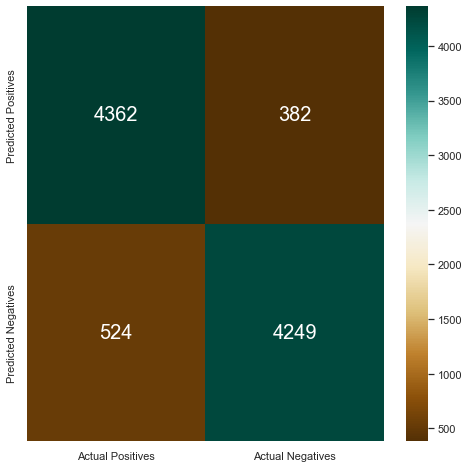

In [93]:
plt.figure(figsize=(8, 8))
sns.heatmap(confmatrix, annot=True, cmap="BrBG", fmt='g', annot_kws={"size":20})

In [86]:
# correct predictions
(4362+4249)/(4362+382+524+4249)

0.9048019333823684